In [10]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.formula.api import ols


# Visualisation of ß error

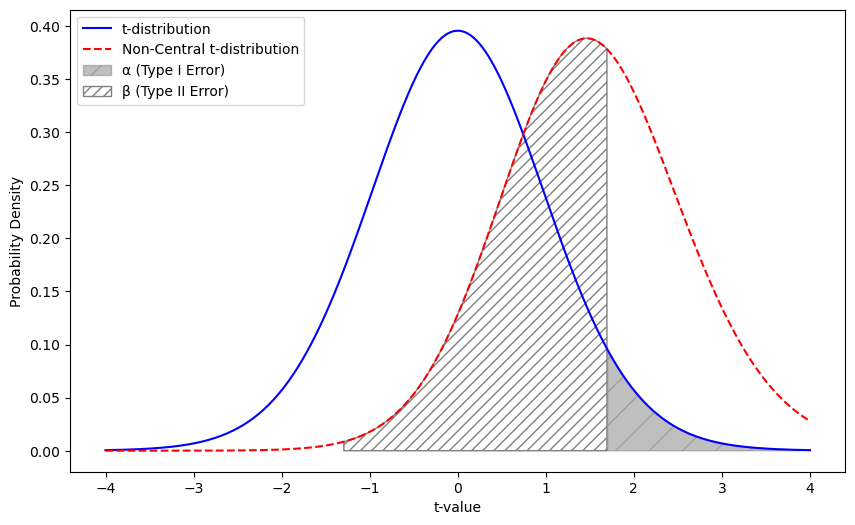

In [11]:
# Define the degrees of freedom (sample size - 1)
degrees_of_freedom = 30 - 1

# Define the significance level (alpha)
alpha = 0.05

# Create a range of x values for the t-distribution (one-tailed)
x = np.linspace(-4, 4, 1000)

# Calculate the t-distribution PDF values for the given degrees of freedom
y = stats.t.pdf(x, df=degrees_of_freedom)

# Calculate the non-central t-distribution PDF values for a specific non-centrality parameter (delta)
delta = 1.5
y_noncentral = stats.nct.pdf(x, df=degrees_of_freedom, nc=delta)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the t-distribution (one-tailed)
ax.plot(x, y, label='t-distribution', color='blue')

# Plot the non-central t-distribution (one-tailed)
ax.plot(x, y_noncentral, label='Non-Central t-distribution', color='red', linestyle='dashed')

# Find the critical t-value corresponding to the significance level (one-tailed test)
t_critical = stats.t.ppf(1 - alpha, df=degrees_of_freedom)

# Shade the Type I error region (Significance Area, one-tailed)
ax.fill_between(x[x >= t_critical], 0, y[x >= t_critical], color='gray', alpha=0.5, hatch='/', label='α (Type I Error)')

# Shade the Type II error region (False Negative, one-tailed)
x_type2 = x[(x < t_critical) & (x > t_critical - 2 * delta)]
ax.fill_between(x_type2, 0, y_noncentral[(x < t_critical) & (x > t_critical - 2 * delta)], color='white', hatch='///', edgecolor='gray', label='β (Type II Error)')

# Add labels and legend
ax.set_xlabel('t-value')
ax.set_ylabel('Probability Density')
ax.set_title('')
ax.legend()

plt.show()

# Visualize the F-Distribution

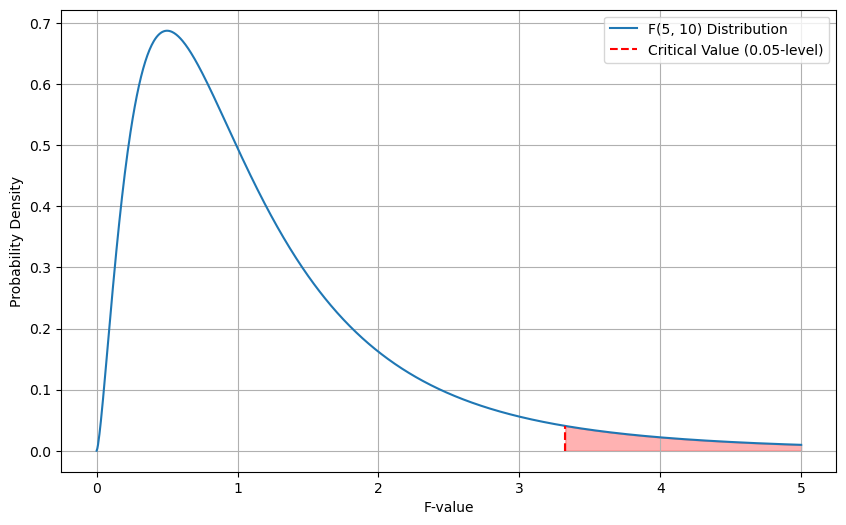

In [12]:
# Define degrees of freedom for numerator (groups - 1) and denominator (total - groups)
dfn = 5
dfd = 10
# Create a range of x values for the F-distribution
x = np.linspace(0, 5, 1000)

# Calculate the F-distribution values
f_dist = stats.f.pdf(x, dfn, dfd)

# Calculate the critical F-value at a certain alpha level (e.g., 0.05)
alpha = 0.05
crit_value = stats.f.ppf(1 - alpha, dfn, dfd)

# Plot the F-distribution
plt.figure(figsize=(10, 6))
plt.plot(x, f_dist, label=f'F({dfn}, {dfd}) Distribution')

# Fill the right-hand side beyond the critical value
x_fill = np.linspace(crit_value, 5, 1000)
plt.fill_between(x_fill, stats.f.pdf(x_fill, dfn, dfd), color='red', alpha=0.3)

# Highlight the critical value with a dashed red line
plt.plot([crit_value, crit_value], [0, stats.f.pdf(crit_value, dfn, dfd)], color='red', linestyle='dashed', label=f'Critical Value ({alpha}-level)')


plt.xlabel('F-value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


# Creating OLS Cell Means Model ANOVA 

In [13]:
# data taken from https://www.bcfoltz.com/mdocuments-library-3/#

data = {
    'Year 1 Scores': [82, 93, 61, 74, 69, 70, 53, 64],
    'Year 2 Scores': [71, 62, 85, 94, 78, 66, 71, 71],
    'Year 3 Scores': [64, 73, 87, 91, 56, 78, 87, 82]
}

df = pd.DataFrame(data)

In [14]:
melted_df = pd.melt(df, value_vars=['Year 1 Scores', 'Year 2 Scores', 'Year 3 Scores'])
melted_df.head()
values_array = melted_df['value'].values

In [15]:
num_observations = sum(len(scores) for scores in data.values())

# Number of factors (Years)
num_years = len(data)

# Create the Cell Mean Model design matrix with zeros
design_matrix = np.zeros((num_observations, num_years)) 

# Populate the dummy variable columns for Years
for i, (year, scores) in enumerate(data.items()):
    if i < num_years:  # Exclude the last year
        design_matrix[i*len(scores):(i+1)*len(scores), i] = 1

print(design_matrix)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


ANOVA and Indicator Variable Regresion without Intercept are the same as can be seen in the next example

In [16]:
np.linalg.inv(design_matrix.T @ design_matrix) @ (design_matrix.T @ values_array)

array([70.75, 74.75, 77.25])

In [17]:
# Perform Dummy Variable Regression
model = ols('Q("value") ~ 0 + C(variable)', data=melted_df).fit()
print("\nDummy Variable Regression Summary:")
print(model.summary())


Dummy Variable Regression Summary:
                            OLS Regression Results                            
Dep. Variable:             Q("value")   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                    0.6214
Date:                Mon, 14 Aug 2023   Prob (F-statistic):              0.547
Time:                        17:32:54   Log-Likelihood:                -91.614
No. Observations:                  24   AIC:                             189.2
Df Residuals:                      21   BIC:                             192.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [18]:
anova_results = stats.f_oneway(df['Year 1 Scores'], df['Year 2 Scores'], df['Year 3 Scores'])

print("ANOVA Results:")
print(anova_results)

ANOVA Results:
F_onewayResult(statistic=0.6213659040082574, pvalue=0.5467984544330617)
